In [1]:
import data_gen
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [2]:
data = np.load("data.npz")

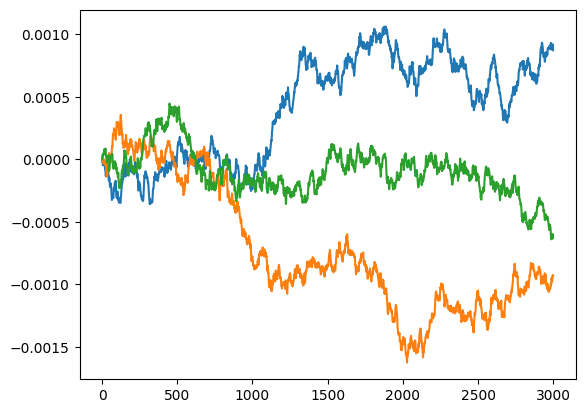

In [3]:
plt.plot(data["gt_bias"][:, :, 0])

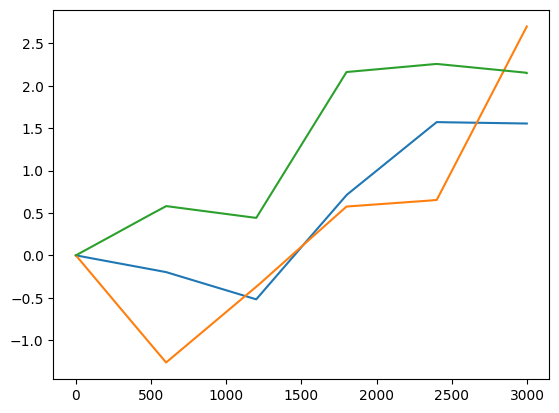

In [4]:
plt.plot(data["gt_omega"][:, :, 0])

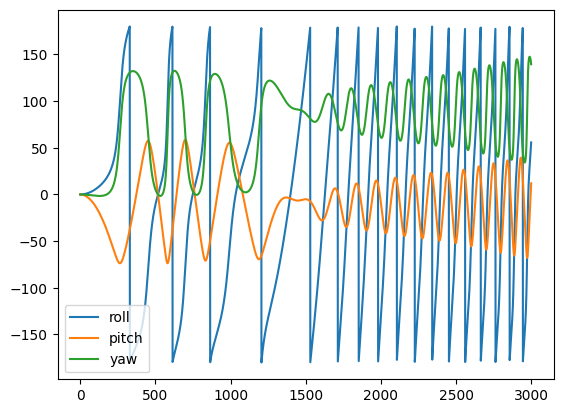

In [5]:
def plot_rpy(rpy: np.ndarray) -> None:
    plt.plot(rpy[:, 0], label="roll")
    plt.plot(rpy[:, 1], label="pitch")
    plt.plot(rpy[:, 2], label="yaw")
    plt.legend()
    plt.show()

rotations = R.from_quat(data["gt_q"][:, :, 0])
plot_rpy(rotations.as_euler("zyx", degrees=True))

In [6]:
from usque import run_ukf, DEFAULT_TYPE
from consts import n, N

# Initialize everything
x0 = np.array([[0, 0, 0, 0, 0, 0]], dtype=DEFAULT_TYPE).T
# P0 = diag([attitude err cov, bias err cov])
P0 = np.eye(n, dtype=DEFAULT_TYPE) * 1e-3  # TODO double check

Y = data["noisy_acc"]  # IMU Accel observations
W = data["noisy_omega"]  # IMU Gyro observations

q, P = run_ukf(x0, P0, W, Y)

Iter: 0
y_k = [[ 8.4731e-03]
 [-8.0278e-03]
 [ 9.8141e+00]], y_m = [[1.3232e-04]
 [2.6208e-04]
 [9.8002e+00]]
v = [[ 0.0083]
 [-0.0083]
 [ 0.014 ]]
Iter: 1
y_k = [[-1.6801e-02]
 [-7.1787e-03]
 [ 9.8214e+00]], y_m = [[ 7.7537e-03]
 [-7.8380e-03]
 [ 9.8100e+00]]
v = [[-0.0246]
 [ 0.0007]
 [ 0.0114]]
Iter: 2
y_k = [[-8.5074e-03]
 [-2.5988e-03]
 [ 9.7981e+00]], y_m = [[-1.1136e-02]
 [-7.3538e-03]
 [ 9.8100e+00]]
v = [[ 0.0026]
 [ 0.0048]
 [-0.0119]]
Iter: 3
y_k = [[5.7377e-04]
 [8.7005e-03]
 [9.8106e+00]], y_m = [[-1.4305e-02]
 [-3.3183e-03]
 [ 9.8100e+00]]
v = [[0.0149]
 [0.012 ]
 [0.0006]]
Iter: 4
y_k = [[-9.4428e-03]
 [-2.9890e-03]
 [ 9.8241e+00]], y_m = [[-8.6539e-03]
 [ 7.1125e-03]
 [ 9.8100e+00]]
v = [[-0.0008]
 [-0.0101]
 [ 0.0141]]
Iter: 5
y_k = [[ 7.4273e-03]
 [-4.4505e-03]
 [ 9.8210e+00]], y_m = [[-1.1839e-02]
 [ 3.9814e-03]
 [ 9.8100e+00]]
v = [[ 0.0193]
 [-0.0084]
 [ 0.011 ]]
Iter: 6
y_k = [[-0.0255]
 [ 0.0107]
 [ 9.8221]], y_m = [[-3.4726e-03]
 [ 1.0682e-03]
 [ 9.8100e+00]]
v 

y_k = [[-1.3552]
 [ 0.1651]
 [ 9.7118]], y_m = [[-1.3741]
 [ 0.1675]
 [ 9.7118]]
v = [[ 1.8933e-02]
 [-2.3758e-03]
 [-4.8639e-06]]
Iter: 82
y_k = [[-1.4122]
 [ 0.1658]
 [ 9.6933]], y_m = [[-1.4053]
 [ 0.1697]
 [ 9.7073]]
v = [[-0.0069]
 [-0.0039]
 [-0.0141]]
Iter: 83
y_k = [[-1.4422]
 [ 0.1773]
 [ 9.7001]], y_m = [[-1.4408]
 [ 0.1719]
 [ 9.7021]]
v = [[-0.0014]
 [ 0.0054]
 [-0.0019]]
Iter: 84
y_k = [[-1.4715]
 [ 0.1778]
 [ 9.6927]], y_m = [[-1.4754]
 [ 0.1754]
 [ 9.6968]]
v = [[ 0.0039]
 [ 0.0024]
 [-0.0041]]
Iter: 85
y_k = [[-1.519 ]
 [ 0.1909]
 [ 9.7187]], y_m = [[-1.5101]
 [ 0.1782]
 [ 9.6914]]
v = [[-0.0089]
 [ 0.0127]
 [ 0.0273]]
Iter: 86
y_k = [[-1.5627]
 [ 0.1914]
 [ 9.6897]], y_m = [[-1.5461]
 [ 0.1833]
 [ 9.6857]]
v = [[-0.0166]
 [ 0.0081]
 [ 0.0041]]
Iter: 87
y_k = [[-1.5815]
 [ 0.2072]
 [ 9.6872]], y_m = [[-1.5842]
 [ 0.188 ]
 [ 9.6794]]
v = [[0.0027]
 [0.0192]
 [0.0078]]
Iter: 88
y_k = [[-1.6088]
 [ 0.2023]
 [ 9.6521]], y_m = [[-1.6195]
 [ 0.1953]
 [ 9.6734]]
v = [[ 0.0108]

y_k = [[-5.2259]
 [ 0.1199]
 [ 8.3017]], y_m = [[-5.2275]
 [ 0.1301]
 [ 8.3001]]
v = [[ 0.0016]
 [-0.0102]
 [ 0.0016]]
Iter: 163
y_k = [[-5.288 ]
 [ 0.1099]
 [ 8.2751]], y_m = [[-5.2849]
 [ 0.1207]
 [ 8.2639]]
v = [[-0.0031]
 [-0.0108]
 [ 0.0113]]
Iter: 164
y_k = [[-5.344 ]
 [ 0.1238]
 [ 8.2312]], y_m = [[-5.3421]
 [ 0.1108]
 [ 8.2271]]
v = [[-0.0019]
 [ 0.013 ]
 [ 0.0041]]
Iter: 165
y_k = [[-5.4144]
 [ 0.0877]
 [ 8.2002]], y_m = [[-5.3997]
 [ 0.1052]
 [ 8.1895]]
v = [[-0.0147]
 [-0.0176]
 [ 0.0106]]
Iter: 166
y_k = [[-5.4811]
 [ 0.0897]
 [ 8.1517]], y_m = [[-5.4579]
 [ 0.0936]
 [ 8.151 ]]
v = [[-0.0232]
 [-0.0039]
 [ 0.0007]]
Iter: 167
y_k = [[-5.5085]
 [ 0.1001]
 [ 8.1074]], y_m = [[-5.5178]
 [ 0.0842]
 [ 8.1107]]
v = [[ 0.0093]
 [ 0.0158]
 [-0.0033]]
Iter: 168
y_k = [[-5.553 ]
 [ 0.0838]
 [ 8.0582]], y_m = [[-5.575 ]
 [ 0.0782]
 [ 8.0715]]
v = [[ 0.022 ]
 [ 0.0056]
 [-0.0133]]
Iter: 169
y_k = [[-5.6371]
 [ 0.0734]
 [ 8.0462]], y_m = [[-5.6316]
 [ 0.0703]
 [ 8.0322]]
v = [[-0.0056]
 

y_k = [[-9.1993]
 [-1.7147]
 [ 2.9638]], y_m = [[-9.1956]
 [-1.706 ]
 [ 2.9608]]
v = [[-0.0037]
 [-0.0086]
 [ 0.0031]]
Iter: 246
y_k = [[-9.213 ]
 [-1.7387]
 [ 2.8609]], y_m = [[-9.2174]
 [-1.7463]
 [ 2.8682]]
v = [[ 0.0043]
 [ 0.0076]
 [-0.0072]]
Iter: 247
y_k = [[-9.2568]
 [-1.7842]
 [ 2.775 ]], y_m = [[-9.2388]
 [-1.7848]
 [ 2.7739]]
v = [[-0.018 ]
 [ 0.0006]
 [ 0.001 ]]
Iter: 248
y_k = [[-9.2469]
 [-1.8126]
 [ 2.6671]], y_m = [[-9.2589]
 [-1.824 ]
 [ 2.6798]]
v = [[ 0.012 ]
 [ 0.0114]
 [-0.0127]]
Iter: 249
y_k = [[-9.2909]
 [-1.8818]
 [ 2.5925]], y_m = [[-9.2784]
 [-1.863 ]
 [ 2.5841]]
v = [[-0.0125]
 [-0.0188]
 [ 0.0084]]
Iter: 250
y_k = [[-9.3001]
 [-1.917 ]
 [ 2.4827]], y_m = [[-9.2954]
 [-1.9057]
 [ 2.49  ]]
v = [[-0.0047]
 [-0.0113]
 [-0.0073]]
Iter: 251
y_k = [[-9.2969]
 [-1.9456]
 [ 2.4063]], y_m = [[-9.3119]
 [-1.9482]
 [ 2.3935]]
v = [[0.0149]
 [0.0026]
 [0.0128]]
Iter: 252
y_k = [[-9.3485]
 [-1.9804]
 [ 2.301 ]], y_m = [[-9.3266]
 [-1.9897]
 [ 2.3002]]
v = [[-0.0218]
 [ 0

y_k = [[-6.1025]
 [-5.8346]
 [-4.9585]], y_m = [[-6.1076]
 [-5.8461]
 [-4.9756]]
v = [[0.005 ]
 [0.0115]
 [0.0171]]
Iter: 329
y_k = [[-6.0097]
 [-5.8848]
 [-5.035 ]], y_m = [[-6.0018]
 [-5.8956]
 [-5.0455]]
v = [[-0.0079]
 [ 0.0108]
 [ 0.0104]]
Iter: 330
y_k = [[-5.8925]
 [-5.9537]
 [-5.1149]], y_m = [[-5.895 ]
 [-5.9438]
 [-5.1143]]
v = [[ 0.0025]
 [-0.0099]
 [-0.0007]]
Iter: 331
y_k = [[-5.7602]
 [-6.0046]
 [-5.1919]], y_m = [[-5.7839]
 [-5.9937]
 [-5.1825]]
v = [[ 0.0237]
 [-0.0109]
 [-0.0094]]
Iter: 332
y_k = [[-5.6625]
 [-6.0474]
 [-5.2549]], y_m = [[-5.6687]
 [-6.044 ]
 [-5.2509]]
v = [[ 0.0062]
 [-0.0034]
 [-0.004 ]]
Iter: 333
y_k = [[-5.5674]
 [-6.0752]
 [-5.3145]], y_m = [[-5.5542]
 [-6.0925]
 [-5.3168]]
v = [[-0.0131]
 [ 0.0173]
 [ 0.0023]]
Iter: 334
y_k = [[-5.4259]
 [-6.1323]
 [-5.3718]], y_m = [[-5.4416]
 [-6.1378]
 [-5.3807]]
v = [[0.0156]
 [0.0055]
 [0.009 ]]
Iter: 335
y_k = [[-5.3273]
 [-6.1906]
 [-5.445 ]], y_m = [[-5.3238]
 [-6.1858]
 [-5.4432]]
v = [[-0.0035]
 [-0.00

y_k = [[ 5.5115]
 [-7.1492]
 [-3.8051]], y_m = [[ 5.5424]
 [-7.1396]
 [-3.8135]]
v = [[-0.0309]
 [-0.0096]
 [ 0.0084]]
Iter: 412
y_k = [[ 5.6576]
 [-7.0999]
 [-3.6901]], y_m = [[ 5.6614]
 [-7.1084]
 [-3.6954]]
v = [[-0.0038]
 [ 0.0084]
 [ 0.0054]]
Iter: 413
y_k = [[ 5.7922]
 [-7.0813]
 [-3.576 ]], y_m = [[ 5.7818]
 [-7.0725]
 [-3.5757]]
v = [[ 0.0104]
 [-0.0088]
 [-0.0003]]
Iter: 414
y_k = [[ 5.9156]
 [-7.0375]
 [-3.4553]], y_m = [[ 5.9003]
 [-7.0352]
 [-3.4538]]
v = [[ 0.0153]
 [-0.0022]
 [-0.0015]]
Iter: 415
y_k = [[ 6.0136]
 [-7.0041]
 [-3.3381]], y_m = [[ 6.0172]
 [-6.9958]
 [-3.3299]]
v = [[-0.0036]
 [-0.0083]
 [-0.0081]]
Iter: 416
y_k = [[ 6.125 ]
 [-6.944 ]
 [-3.1858]], y_m = [[ 6.1296]
 [-6.9563]
 [-3.2053]]
v = [[-0.0047]
 [ 0.0123]
 [ 0.0194]]
Iter: 417
y_k = [[ 6.2295]
 [-6.902 ]
 [-3.0836]], y_m = [[ 6.2417]
 [-6.9153]
 [-3.0751]]
v = [[-0.0123]
 [ 0.0132]
 [-0.0086]]
Iter: 418
y_k = [[ 6.3548]
 [-6.8853]
 [-2.9484]], y_m = [[ 6.3504]
 [-6.8719]
 [-2.9472]]
v = [[ 0.0044]
 

y_k = [[ 4.3519]
 [-1.2012]
 [ 8.7124]], y_m = [[ 4.3443]
 [-1.1919]
 [ 8.7145]]
v = [[ 0.0077]
 [-0.0093]
 [-0.0021]]
Iter: 496
y_k = [[ 4.19  ]
 [-1.1148]
 [ 8.8058]], y_m = [[ 4.1729]
 [-1.1235]
 [ 8.8069]]
v = [[ 0.0171]
 [ 0.0088]
 [-0.0011]]
Iter: 497
y_k = [[ 4.0067]
 [-1.0535]
 [ 8.8971]], y_m = [[ 4.0002]
 [-1.0532]
 [ 8.8952]]
v = [[ 0.0065]
 [-0.0002]
 [ 0.0019]]
Iter: 498
y_k = [[ 3.8294]
 [-0.9703]
 [ 8.9897]], y_m = [[ 3.8229]
 [-0.9859]
 [ 8.9805]]
v = [[0.0065]
 [0.0156]
 [0.0092]]
Iter: 499
y_k = [[ 3.6543]
 [-0.9108]
 [ 9.0577]], y_m = [[ 3.643 ]
 [-0.9174]
 [ 9.0622]]
v = [[ 0.0113]
 [ 0.0066]
 [-0.0045]]
Iter: 500
y_k = [[ 3.4382]
 [-0.8495]
 [ 9.1138]], y_m = [[ 3.4614]
 [-0.8517]
 [ 9.1394]]
v = [[-0.0232]
 [ 0.0022]
 [-0.0257]]
Iter: 501
y_k = [[ 3.2725]
 [-0.7874]
 [ 9.2053]], y_m = [[ 3.2735]
 [-0.7886]
 [ 9.214 ]]
v = [[-0.001 ]
 [ 0.0011]
 [-0.0088]]
Iter: 502
y_k = [[ 3.0765]
 [-0.719 ]
 [ 9.2765]], y_m = [[ 3.0852]
 [-0.7268]
 [ 9.2838]]
v = [[-0.0086]
 [ 0

y_k = [[-9.3841]
 [-2.2512]
 [ 1.7191]], y_m = [[-9.3927]
 [-2.2417]
 [ 1.7284]]
v = [[ 0.0086]
 [-0.0095]
 [-0.0094]]
Iter: 579
y_k = [[-9.4121]
 [-2.3491]
 [ 1.5198]], y_m = [[-9.4062]
 [-2.343 ]
 [ 1.5066]]
v = [[-0.0059]
 [-0.0061]
 [ 0.0132]]
Iter: 580
y_k = [[-9.3951]
 [-2.4549]
 [ 1.2663]], y_m = [[-9.413 ]
 [-2.4443]
 [ 1.2875]]
v = [[ 0.0179]
 [-0.0106]
 [-0.0212]]
Iter: 581
y_k = [[-9.4197]
 [-2.5244]
 [ 1.076 ]], y_m = [[-9.4134]
 [-2.548 ]
 [ 1.0636]]
v = [[-0.0063]
 [ 0.0236]
 [ 0.0124]]
Iter: 582
y_k = [[-9.432 ]
 [-2.6392]
 [ 0.8518]], y_m = [[-9.4083]
 [-2.6471]
 [ 0.8445]]
v = [[-0.0237]
 [ 0.0079]
 [ 0.0073]]
Iter: 583
y_k = [[-9.395]
 [-2.753]
 [ 0.637]], y_m = [[-9.3963]
 [-2.7487]
 [ 0.6245]]
v = [[ 0.0013]
 [-0.0043]
 [ 0.0125]]
Iter: 584
y_k = [[-9.3833]
 [-2.8572]
 [ 0.4124]], y_m = [[-9.3768]
 [-2.8541]
 [ 0.4059]]
v = [[-0.0064]
 [-0.0031]
 [ 0.0064]]
Iter: 585
y_k = [[-9.3602]
 [-2.9446]
 [ 0.1942]], y_m = [[-9.351 ]
 [-2.9598]
 [ 0.1872]]
v = [[-0.0092]
 [ 0

y_k = [[ 4.6087]
 [-7.2478]
 [-4.7288]], y_m = [[ 4.6129]
 [-7.2474]
 [-4.7362]]
v = [[-0.0042]
 [-0.0003]
 [ 0.0074]]
Iter: 662
y_k = [[ 4.8132]
 [-7.218 ]
 [-4.6041]], y_m = [[ 4.8006]
 [-7.2127]
 [-4.6008]]
v = [[ 0.0125]
 [-0.0053]
 [-0.0033]]
Iter: 663
y_k = [[ 4.9939]
 [-7.1803]
 [-4.479 ]], y_m = [[ 4.9861]
 [-7.1744]
 [-4.4613]]
v = [[ 0.0078]
 [-0.0059]
 [-0.0177]]
Iter: 664
y_k = [[ 5.152 ]
 [-7.1467]
 [-4.323 ]], y_m = [[ 5.1663]
 [-7.1332]
 [-4.3201]]
v = [[-0.0143]
 [-0.0136]
 [-0.0029]]
Iter: 665
y_k = [[ 5.352 ]
 [-7.0944]
 [-4.1739]], y_m = [[ 5.3404]
 [-7.0922]
 [-4.1733]]
v = [[ 0.0116]
 [-0.0022]
 [-0.0006]]
Iter: 666
y_k = [[ 5.5018]
 [-7.0303]
 [-4.0186]], y_m = [[ 5.5137]
 [-7.0468]
 [-4.0223]]
v = [[-0.0119]
 [ 0.0165]
 [ 0.0037]]
Iter: 667
y_k = [[ 5.6946]
 [-7.0138]
 [-3.881 ]], y_m = [[ 5.6816]
 [-6.9991]
 [-3.8689]]
v = [[ 0.013 ]
 [-0.0148]
 [-0.0121]]
Iter: 668
y_k = [[ 5.8719]
 [-6.958 ]
 [-3.7143]], y_m = [[ 5.8451]
 [-6.9496]
 [-3.7113]]
v = [[ 0.0268]
 

y_k = [[ 3.1879]
 [-0.7325]
 [ 9.2511]], y_m = [[ 3.1869]
 [-0.7414]
 [ 9.2482]]
v = [[0.0011]
 [0.0089]
 [0.0028]]
Iter: 746
y_k = [[ 2.9786]
 [-0.699 ]
 [ 9.302 ]], y_m = [[ 2.9937]
 [-0.6845]
 [ 9.3169]]
v = [[-0.0151]
 [-0.0145]
 [-0.0149]]
Iter: 747
y_k = [[ 2.7996]
 [-0.6129]
 [ 9.3927]], y_m = [[ 2.7977]
 [-0.6331]
 [ 9.3813]]
v = [[0.0019]
 [0.0202]
 [0.0115]]
Iter: 748
y_k = [[ 2.6119]
 [-0.5676]
 [ 9.4363]], y_m = [[ 2.6011]
 [-0.5778]
 [ 9.4412]]
v = [[ 0.0107]
 [ 0.0102]
 [-0.0049]]
Iter: 749
y_k = [[ 2.4046]
 [-0.5434]
 [ 9.4854]], y_m = [[ 2.4046]
 [-0.5263]
 [ 9.4962]]
v = [[ 4.8670e-05]
 [-1.7114e-02]
 [-1.0711e-02]]
Iter: 750
y_k = [[ 2.1935]
 [-0.5051]
 [ 9.5459]], y_m = [[ 2.2056]
 [-0.4808]
 [ 9.5467]]
v = [[-0.0121]
 [-0.0244]
 [-0.0009]]
Iter: 751
y_k = [[ 2.0019]
 [-0.4322]
 [ 9.5927]], y_m = [[ 2.0033]
 [-0.4385]
 [ 9.5932]]
v = [[-0.0014]
 [ 0.0063]
 [-0.0006]]
Iter: 752
y_k = [[ 1.7941]
 [-0.4153]
 [ 9.6256]], y_m = [[ 1.8016]
 [-0.3934]
 [ 9.6351]]
v = [[-0.0

y_k = [[-9.21  ]
 [-2.5064]
 [ 2.2095]], y_m = [[-9.2219]
 [-2.5124]
 [ 2.2093]]
v = [[0.0118]
 [0.006 ]
 [0.0002]]
Iter: 829
y_k = [[-9.2342]
 [-2.5951]
 [ 2.0292]], y_m = [[-9.2397]
 [-2.5921]
 [ 2.0362]]
v = [[ 0.0055]
 [-0.0031]
 [-0.007 ]]
Iter: 830
y_k = [[-9.2622]
 [-2.6516]
 [ 1.848 ]], y_m = [[-9.2531]
 [-2.6733]
 [ 1.8624]]
v = [[-0.0091]
 [ 0.0218]
 [-0.0145]]
Iter: 831
y_k = [[-9.2452]
 [-2.7464]
 [ 1.6902]], y_m = [[-9.2641]
 [-2.7506]
 [ 1.6873]]
v = [[0.0189]
 [0.0042]
 [0.0029]]
Iter: 832
y_k = [[-9.2788]
 [-2.8433]
 [ 1.5112]], y_m = [[-9.2693]
 [-2.8319]
 [ 1.5154]]
v = [[-0.0095]
 [-0.0114]
 [-0.0042]]
Iter: 833
y_k = [[-9.2683]
 [-2.9317]
 [ 1.3483]], y_m = [[-9.2703]
 [-2.9149]
 [ 1.3423]]
v = [[ 0.002 ]
 [-0.0168]
 [ 0.006 ]]
Iter: 834
y_k = [[-9.2652]
 [-3.0068]
 [ 1.1642]], y_m = [[-9.2665]
 [-2.9992]
 [ 1.1719]]
v = [[ 0.0012]
 [-0.0076]
 [-0.0077]]
Iter: 835
y_k = [[-9.2573]
 [-3.082 ]
 [ 1.0035]], y_m = [[-9.2592]
 [-3.083 ]
 [ 0.9996]]
v = [[0.0019]
 [0.001 

y_k = [[-0.1751]
 [-7.7079]
 [-6.0531]], y_m = [[-0.1625]
 [-7.717 ]
 [-6.0545]]
v = [[-0.0126]
 [ 0.0091]
 [ 0.0015]]
Iter: 912
y_k = [[ 5.1502e-03]
 [-7.7550e+00]
 [-6.0300e+00]], y_m = [[ 6.3895e-03]
 [-7.7327e+00]
 [-6.0366e+00]]
v = [[-0.0012]
 [-0.0222]
 [ 0.0066]]
Iter: 913
y_k = [[ 0.1772]
 [-7.7422]
 [-6.0057]], y_m = [[ 0.1764]
 [-7.7492]
 [-6.0128]]
v = [[0.0007]
 [0.0071]
 [0.0072]]
Iter: 914
y_k = [[ 0.3478]
 [-7.7598]
 [-6.0023]], y_m = [[ 0.3461]
 [-7.7623]
 [-5.9885]]
v = [[ 0.0017]
 [ 0.0025]
 [-0.0138]]
Iter: 915
y_k = [[ 0.5075]
 [-7.7843]
 [-5.9451]], y_m = [[ 0.5156]
 [-7.7729]
 [-5.9625]]
v = [[-0.0081]
 [-0.0113]
 [ 0.0174]]
Iter: 916
y_k = [[ 0.6982]
 [-7.7931]
 [-5.9506]], y_m = [[ 0.6827]
 [-7.7852]
 [-5.9297]]
v = [[ 0.0155]
 [-0.0079]
 [-0.0209]]
Iter: 917
y_k = [[ 0.8581]
 [-7.7893]
 [-5.9043]], y_m = [[ 0.8529]
 [-7.7928]
 [-5.8976]]
v = [[ 0.0052]
 [ 0.0035]
 [-0.0067]]
Iter: 918
y_k = [[ 1.0212]
 [-7.7816]
 [-5.8803]], y_m = [[ 1.0204]
 [-7.7993]
 [-5.86

y_k = [[ 8.0677]
 [-4.9519]
 [ 2.577 ]], y_m = [[ 8.074 ]
 [-4.9359]
 [ 2.5853]]
v = [[-0.0063]
 [-0.0161]
 [-0.0083]]
Iter: 995
y_k = [[ 8.0554]
 [-4.8506]
 [ 2.7022]], y_m = [[ 8.0661]
 [-4.8734]
 [ 2.7247]]
v = [[-0.0107]
 [ 0.0228]
 [-0.0225]]
Iter: 996
y_k = [[ 8.0636]
 [-4.8059]
 [ 2.8865]], y_m = [[ 8.0583]
 [-4.8069]
 [ 2.8625]]
v = [[0.0054]
 [0.001 ]
 [0.0241]]
Iter: 997
y_k = [[ 8.0578]
 [-4.7288]
 [ 3.0013]], y_m = [[ 8.0456]
 [-4.7406]
 [ 3.0052]]
v = [[ 0.0122]
 [ 0.0118]
 [-0.0039]]
Iter: 998
y_k = [[ 8.0182]
 [-4.6623]
 [ 3.1378]], y_m = [[ 8.0323]
 [-4.673 ]
 [ 3.1436]]
v = [[-0.0141]
 [ 0.0107]
 [-0.0058]]
Iter: 999
y_k = [[ 8.0205]
 [-4.6013]
 [ 3.295 ]], y_m = [[ 8.015 ]
 [-4.6068]
 [ 3.2822]]
v = [[0.0055]
 [0.0056]
 [0.0128]]
Iter: 1000
y_k = [[ 7.9869]
 [-4.5372]
 [ 3.4262]], y_m = [[ 7.9948]
 [-4.5397]
 [ 3.422 ]]
v = [[-0.0079]
 [ 0.0025]
 [ 0.0042]]
Iter: 1001
y_k = [[ 7.9534]
 [-4.4778]
 [ 3.5595]], y_m = [[ 7.9715]
 [-4.474 ]
 [ 3.5601]]
v = [[-0.0181]
 [-0.

y_k = [[ 0.5149]
 [-0.6511]
 [ 9.7652]], y_m = [[ 0.5388]
 [-0.6518]
 [ 9.7735]]
v = [[-0.0239]
 [ 0.0007]
 [-0.0083]]
Iter: 1078
y_k = [[ 0.4057]
 [-0.6316]
 [ 9.7839]], y_m = [[ 0.3969]
 [-0.6296]
 [ 9.7817]]
v = [[ 0.0088]
 [-0.0021]
 [ 0.0022]]
Iter: 1079
y_k = [[ 0.2631]
 [-0.6083]
 [ 9.7918]], y_m = [[ 0.2597]
 [-0.609 ]
 [ 9.7876]]
v = [[0.0034]
 [0.0006]
 [0.0041]]
Iter: 1080
y_k = [[ 0.1051]
 [-0.6042]
 [ 9.7823]], y_m = [[ 0.1217]
 [-0.5886]
 [ 9.7916]]
v = [[-0.0166]
 [-0.0157]
 [-0.0092]]
Iter: 1081
y_k = [[-0.0152]
 [-0.5642]
 [ 9.7852]], y_m = [[-0.0193]
 [-0.5717]
 [ 9.7933]]
v = [[ 0.0041]
 [ 0.0076]
 [-0.0081]]
Iter: 1082
y_k = [[-0.1587]
 [-0.5435]
 [ 9.7963]], y_m = [[-0.1574]
 [-0.5525]
 [ 9.7932]]
v = [[-0.0013]
 [ 0.009 ]
 [ 0.0032]]
Iter: 1083
y_k = [[-0.3117]
 [-0.5261]
 [ 9.803 ]], y_m = [[-0.2959]
 [-0.5337]
 [ 9.791 ]]
v = [[-0.0157]
 [ 0.0077]
 [ 0.012 ]]
Iter: 1084
y_k = [[-0.4335]
 [-0.5318]
 [ 9.7798]], y_m = [[-0.4366]
 [-0.5161]
 [ 9.7867]]
v = [[ 0.003

y_k = [[-8.4357]
 [-1.7995]
 [ 4.6384]], y_m = [[-8.4524]
 [-1.7848]
 [ 4.6484]]
v = [[ 0.0167]
 [-0.0147]
 [-0.01  ]]
Iter: 1161
y_k = [[-8.507 ]
 [-1.8346]
 [ 4.5514]], y_m = [[-8.5027]
 [-1.8307]
 [ 4.5375]]
v = [[-0.0043]
 [-0.0039]
 [ 0.0139]]
Iter: 1162
y_k = [[-8.5397]
 [-1.8666]
 [ 4.4031]], y_m = [[-8.5508]
 [-1.8746]
 [ 4.4278]]
v = [[ 0.0111]
 [ 0.0081]
 [-0.0247]]
Iter: 1163
y_k = [[-8.6133]
 [-1.9188]
 [ 4.3095]], y_m = [[-8.5991]
 [-1.918 ]
 [ 4.3144]]
v = [[-0.0143]
 [-0.0009]
 [-0.0049]]
Iter: 1164
y_k = [[-8.6305]
 [-1.9432]
 [ 4.1959]], y_m = [[-8.6451]
 [-1.9623]
 [ 4.2008]]
v = [[ 0.0146]
 [ 0.0192]
 [-0.0049]]
Iter: 1165
y_k = [[-8.6893]
 [-1.9957]
 [ 4.0676]], y_m = [[-8.6891]
 [-2.005 ]
 [ 4.0886]]
v = [[-0.0003]
 [ 0.0092]
 [-0.021 ]]
Iter: 1166
y_k = [[-8.7213]
 [-2.0381]
 [ 3.9839]], y_m = [[-8.732 ]
 [-2.0495]
 [ 3.9734]]
v = [[0.0107]
 [0.0115]
 [0.0105]]
Iter: 1167
y_k = [[-8.7657]
 [-2.0979]
 [ 3.855 ]], y_m = [[-8.7712]
 [-2.0938]
 [ 3.8624]]
v = [[ 0.005

y_k = [[-6.8771]
 [-6.0305]
 [-3.564 ]], y_m = [[-6.8813]
 [-6.0146]
 [-3.5649]]
v = [[ 0.0043]
 [-0.0159]
 [ 0.0009]]
Iter: 1244
y_k = [[-6.8103]
 [-6.0705]
 [-3.6258]], y_m = [[-6.808 ]
 [-6.0663]
 [-3.6176]]
v = [[-0.0023]
 [-0.0041]
 [-0.0081]]
Iter: 1245
y_k = [[-6.7399]
 [-6.1131]
 [-3.6686]], y_m = [[-6.735 ]
 [-6.1158]
 [-3.6706]]
v = [[-0.005 ]
 [ 0.0028]
 [ 0.002 ]]
Iter: 1246
y_k = [[-6.6576]
 [-6.1573]
 [-3.7168]], y_m = [[-6.6623]
 [-6.1649]
 [-3.7208]]
v = [[0.0047]
 [0.0075]
 [0.004 ]]
Iter: 1247
y_k = [[-6.5872]
 [-6.2055]
 [-3.775 ]], y_m = [[-6.5891]
 [-6.2137]
 [-3.7696]]
v = [[ 0.0019]
 [ 0.0082]
 [-0.0054]]
Iter: 1248
y_k = [[-6.5014]
 [-6.2555]
 [-3.8123]], y_m = [[-6.5152]
 [-6.2619]
 [-3.818 ]]
v = [[0.0138]
 [0.0064]
 [0.0057]]
Iter: 1249
y_k = [[-6.4488]
 [-6.313 ]
 [-3.8674]], y_m = [[-6.4401]
 [-6.3112]
 [-3.8639]]
v = [[-0.0087]
 [-0.0017]
 [-0.0035]]
Iter: 1250
y_k = [[-6.3597]
 [-6.3631]
 [-3.9071]], y_m = [[-6.3655]
 [-6.3595]
 [-3.9082]]
v = [[ 0.0058]


y_k = [[-1.4029]
 [-9.0713]
 [-3.4504]], y_m = [[-1.3924]
 [-9.0748]
 [-3.4563]]
v = [[-0.0106]
 [ 0.0035]
 [ 0.0059]]
Iter: 1326
y_k = [[-1.3419]
 [-9.0808]
 [-3.4265]], y_m = [[-1.3543]
 [-9.0963]
 [-3.4145]]
v = [[ 0.0124]
 [ 0.0155]
 [-0.012 ]]
Iter: 1327
y_k = [[-1.317 ]
 [-9.1293]
 [-3.3736]], y_m = [[-1.3138]
 [-9.1168]
 [-3.3755]]
v = [[-0.0032]
 [-0.0125]
 [ 0.0019]]
Iter: 1328
y_k = [[-1.2767]
 [-9.1542]
 [-3.3379]], y_m = [[-1.2763]
 [-9.1378]
 [-3.3328]]
v = [[-0.0004]
 [-0.0164]
 [-0.0051]]
Iter: 1329
y_k = [[-1.2374]
 [-9.1512]
 [-3.2838]], y_m = [[-1.2394]
 [-9.1582]
 [-3.2906]]
v = [[0.002 ]
 [0.007 ]
 [0.0067]]
Iter: 1330
y_k = [[-1.1835]
 [-9.1739]
 [-3.2564]], y_m = [[-1.2033]
 [-9.1784]
 [-3.2474]]
v = [[ 0.0199]
 [ 0.0045]
 [-0.009 ]]
Iter: 1331
y_k = [[-1.1783]
 [-9.2034]
 [-3.1867]], y_m = [[-1.1653]
 [-9.1978]
 [-3.2061]]
v = [[-0.013 ]
 [-0.0057]
 [ 0.0194]]
Iter: 1332
y_k = [[-1.1496]
 [-9.2102]
 [-3.1546]], y_m = [[-1.1338]
 [-9.2177]
 [-3.1599]]
v = [[-0.015

y_k = [[-0.8648]
 [-9.7577]
 [-0.4887]], y_m = [[-0.8521]
 [-9.7612]
 [-0.4788]]
v = [[-0.0127]
 [ 0.0034]
 [-0.0099]]
Iter: 1409
y_k = [[-0.8637]
 [-9.7559]
 [-0.4513]], y_m = [[-0.8654]
 [-9.7607]
 [-0.4649]]
v = [[0.0018]
 [0.0048]
 [0.0137]]
Iter: 1410
y_k = [[-0.8709]
 [-9.755 ]
 [-0.4458]], y_m = [[-0.8763]
 [-9.7605]
 [-0.448 ]]
v = [[0.0054]
 [0.0055]
 [0.0022]]
Iter: 1411
y_k = [[-0.8919]
 [-9.7796]
 [-0.4246]], y_m = [[-0.887 ]
 [-9.7602]
 [-0.4328]]
v = [[-0.0049]
 [-0.0194]
 [ 0.0082]]
Iter: 1412
y_k = [[-0.8885]
 [-9.7534]
 [-0.4252]], y_m = [[-0.8985]
 [-9.7598]
 [-0.4175]]
v = [[ 0.01  ]
 [ 0.0064]
 [-0.0078]]
Iter: 1413
y_k = [[-0.9211]
 [-9.759 ]
 [-0.4191]], y_m = [[-0.9082]
 [-9.7594]
 [-0.4053]]
v = [[-0.0129]
 [ 0.0004]
 [-0.0137]]
Iter: 1414
y_k = [[-0.9148]
 [-9.7562]
 [-0.39  ]], y_m = [[-0.9211]
 [-9.7587]
 [-0.3947]]
v = [[0.0063]
 [0.0025]
 [0.0047]]
Iter: 1415
y_k = [[-0.9072]
 [-9.7532]
 [-0.3868]], y_m = [[-0.9308]
 [-9.7583]
 [-0.3817]]
v = [[ 0.0237]
 [ 

y_k = [[-0.8902]
 [-9.7706]
 [ 0.3498]], y_m = [[-0.8881]
 [-9.7635]
 [ 0.3491]]
v = [[-0.002 ]
 [-0.0071]
 [ 0.0007]]
Iter: 1492
y_k = [[-0.8882]
 [-9.756 ]
 [ 0.3569]], y_m = [[-0.8842]
 [-9.763 ]
 [ 0.3727]]
v = [[-0.004 ]
 [ 0.007 ]
 [-0.0157]]
Iter: 1493
y_k = [[-0.8787]
 [-9.7906]
 [ 0.3824]], y_m = [[-0.8813]
 [-9.7624]
 [ 0.3943]]
v = [[ 0.0025]
 [-0.0282]
 [-0.012 ]]
Iter: 1494
y_k = [[-0.8918]
 [-9.7609]
 [ 0.4337]], y_m = [[-0.8773]
 [-9.7618]
 [ 0.4168]]
v = [[-0.0145]
 [ 0.0009]
 [ 0.0169]]
Iter: 1495
y_k = [[-0.866 ]
 [-9.78  ]
 [ 0.4361]], y_m = [[-0.8769]
 [-9.7606]
 [ 0.444 ]]
v = [[ 0.0109]
 [-0.0194]
 [-0.008 ]]
Iter: 1496
y_k = [[-0.8627]
 [-9.7684]
 [ 0.4706]], y_m = [[-0.8728]
 [-9.7599]
 [ 0.4683]]
v = [[ 0.0102]
 [-0.0085]
 [ 0.0023]]
Iter: 1497
y_k = [[-0.8852]
 [-9.762 ]
 [ 0.4832]], y_m = [[-0.8696]
 [-9.7589]
 [ 0.4946]]
v = [[-0.0155]
 [-0.0032]
 [-0.0114]]
Iter: 1498
y_k = [[-0.8585]
 [-9.7531]
 [ 0.5178]], y_m = [[-0.8706]
 [-9.7575]
 [ 0.5195]]
v = [[ 0.

y_k = [[-3.4174]
 [-9.038 ]
 [ 1.7562]], y_m = [[-3.4297]
 [-9.0197]
 [ 1.7657]]
v = [[ 0.0123]
 [-0.0183]
 [-0.0095]]
Iter: 1575
y_k = [[-3.4767]
 [-9.0261]
 [ 1.7416]], y_m = [[-3.4826]
 [-9.006 ]
 [ 1.7321]]
v = [[ 0.0058]
 [-0.0201]
 [ 0.0095]]
Iter: 1576
y_k = [[-3.5314]
 [-9.0005]
 [ 1.7072]], y_m = [[-3.5357]
 [-8.9916]
 [ 1.6991]]
v = [[ 0.0042]
 [-0.0089]
 [ 0.0082]]
Iter: 1577
y_k = [[-3.5829]
 [-8.9677]
 [ 1.6649]], y_m = [[-3.5887]
 [-8.9771]
 [ 1.664 ]]
v = [[0.0058]
 [0.0094]
 [0.0009]]
Iter: 1578
y_k = [[-3.663 ]
 [-8.9524]
 [ 1.622 ]], y_m = [[-3.6414]
 [-8.9627]
 [ 1.6265]]
v = [[-0.0216]
 [ 0.0103]
 [-0.0045]]
Iter: 1579
y_k = [[-3.7014]
 [-8.9507]
 [ 1.5803]], y_m = [[-3.6975]
 [-8.947 ]
 [ 1.5862]]
v = [[-0.004 ]
 [-0.0037]
 [-0.006 ]]
Iter: 1580
y_k = [[-3.7339]
 [-8.9213]
 [ 1.5344]], y_m = [[-3.7495]
 [-8.9329]
 [ 1.5433]]
v = [[ 0.0155]
 [ 0.0115]
 [-0.0089]]
Iter: 1581
y_k = [[-3.808 ]
 [-8.9115]
 [ 1.5064]], y_m = [[-3.7993]
 [-8.9195]
 [ 1.4981]]
v = [[-0.008

y_k = [[-1.4363]
 [-9.2524]
 [-2.9102]], y_m = [[-1.4436]
 [-9.2544]
 [-2.9167]]
v = [[0.0073]
 [0.002 ]
 [0.0065]]
Iter: 1658
y_k = [[-1.3311]
 [-9.2668]
 [-2.8941]], y_m = [[-1.3382]
 [-9.2759]
 [-2.8987]]
v = [[0.0072]
 [0.0092]
 [0.0046]]
Iter: 1659
y_k = [[-1.2276]
 [-9.2905]
 [-2.8851]], y_m = [[-1.2332]
 [-9.2971]
 [-2.8772]]
v = [[ 0.0057]
 [ 0.0066]
 [-0.0079]]
Iter: 1660
y_k = [[-1.1383]
 [-9.3166]
 [-2.8465]], y_m = [[-1.1289]
 [-9.3177]
 [-2.8533]]
v = [[-0.0093]
 [ 0.0012]
 [ 0.0068]]
Iter: 1661
y_k = [[-1.0321]
 [-9.3359]
 [-2.8422]], y_m = [[-1.0273]
 [-9.3387]
 [-2.8229]]
v = [[-0.0049]
 [ 0.0028]
 [-0.0192]]
Iter: 1662
y_k = [[-0.9118]
 [-9.3752]
 [-2.7936]], y_m = [[-0.9251]
 [-9.3585]
 [-2.7927]]
v = [[ 0.0133]
 [-0.0167]
 [-0.0009]]
Iter: 1663
y_k = [[-0.8192]
 [-9.3638]
 [-2.7682]], y_m = [[-0.8211]
 [-9.3794]
 [-2.7548]]
v = [[ 0.0019]
 [ 0.0156]
 [-0.0134]]
Iter: 1664
y_k = [[-0.7126]
 [-9.392 ]
 [-2.717 ]], y_m = [[-0.7202]
 [-9.3989]
 [-2.7163]]
v = [[ 0.0076]


y_k = [[-3.1233]
 [-8.704 ]
 [ 3.3491]], y_m = [[-3.1127]
 [-8.6834]
 [ 3.3385]]
v = [[-0.0105]
 [-0.0206]
 [ 0.0106]]
Iter: 1741
y_k = [[-3.2629]
 [-8.6554]
 [ 3.2923]], y_m = [[-3.252 ]
 [-8.6495]
 [ 3.2935]]
v = [[-0.0109]
 [-0.0059]
 [-0.0012]]
Iter: 1742
y_k = [[-3.3922]
 [-8.6289]
 [ 3.2557]], y_m = [[-3.3904]
 [-8.616 ]
 [ 3.2412]]
v = [[-0.0018]
 [-0.0129]
 [ 0.0145]]
Iter: 1743
y_k = [[-3.5352]
 [-8.582 ]
 [ 3.1906]], y_m = [[-3.5252]
 [-8.5827]
 [ 3.1852]]
v = [[-0.0099]
 [ 0.0007]
 [ 0.0054]]
Iter: 1744
y_k = [[-3.6595]
 [-8.5466]
 [ 3.1077]], y_m = [[-3.6602]
 [-8.5494]
 [ 3.122 ]]
v = [[ 0.0007]
 [ 0.0028]
 [-0.0143]]
Iter: 1745
y_k = [[-3.7769]
 [-8.5095]
 [ 3.0394]], y_m = [[-3.7913]
 [-8.5181]
 [ 3.0503]]
v = [[ 0.0145]
 [ 0.0086]
 [-0.011 ]]
Iter: 1746
y_k = [[-3.9311]
 [-8.4953]
 [ 2.9772]], y_m = [[-3.9185]
 [-8.4876]
 [ 2.9736]]
v = [[-0.0126]
 [-0.0078]
 [ 0.0036]]
Iter: 1747
y_k = [[-4.0332]
 [-8.4709]
 [ 2.8718]], y_m = [[-4.0451]
 [-8.4564]
 [ 2.8917]]
v = [[ 0.

y_k = [[ 1.1461]
 [-9.4376]
 [-2.3986]], y_m = [[ 1.1418]
 [-9.4489]
 [-2.3772]]
v = [[ 0.0043]
 [ 0.0113]
 [-0.0215]]
Iter: 1824
y_k = [[ 1.2319]
 [-9.4586]
 [-2.2404]], y_m = [[ 1.2528]
 [-9.4699]
 [-2.2333]]
v = [[-0.0208]
 [ 0.0113]
 [-0.0072]]
Iter: 1825
y_k = [[ 1.3491]
 [-9.4888]
 [-2.0727]], y_m = [[ 1.3532]
 [-9.4906]
 [-2.0817]]
v = [[-0.0041]
 [ 0.0018]
 [ 0.0091]]
Iter: 1826
y_k = [[ 1.4456]
 [-9.5168]
 [-1.9228]], y_m = [[ 1.449 ]
 [-9.5099]
 [-1.9229]]
v = [[-3.4467e-03]
 [-6.8107e-03]
 [ 8.4564e-05]]
Iter: 1827
y_k = [[ 1.5366]
 [-9.519 ]
 [-1.765 ]], y_m = [[ 1.5372]
 [-9.5276]
 [-1.7603]]
v = [[-0.0006]
 [ 0.0085]
 [-0.0047]]
Iter: 1828
y_k = [[ 1.623 ]
 [-9.5514]
 [-1.5897]], y_m = [[ 1.6189]
 [-9.5432]
 [-1.5948]]
v = [[ 0.0041]
 [-0.0082]
 [ 0.005 ]]
Iter: 1829
y_k = [[ 1.6757]
 [-9.56  ]
 [-1.416 ]], y_m = [[ 1.6935]
 [-9.5573]
 [-1.4234]]
v = [[-0.0178]
 [-0.0027]
 [ 0.0075]]
Iter: 1830
y_k = [[ 1.7719]
 [-9.5675]
 [-1.2529]], y_m = [[ 1.7572]
 [-9.5703]
 [-1.248 

y_k = [[-6.0937]
 [-7.68  ]
 [-0.4434]], y_m = [[-6.0847]
 [-7.6815]
 [-0.455 ]]
v = [[-0.009 ]
 [ 0.0014]
 [ 0.0116]]
Iter: 1907
y_k = [[-6.0747]
 [-7.6792]
 [-0.6429]], y_m = [[-6.0617]
 [-7.6851]
 [-0.657 ]]
v = [[-0.0131]
 [ 0.0059]
 [ 0.0141]]
Iter: 1908
y_k = [[-6.0237]
 [-7.6849]
 [-0.8648]], y_m = [[-6.0299]
 [-7.6903]
 [-0.8576]]
v = [[ 0.0062]
 [ 0.0054]
 [-0.0072]]
Iter: 1909
y_k = [[-5.9918]
 [-7.6986]
 [-1.0672]], y_m = [[-5.9868]
 [-7.6988]
 [-1.0597]]
v = [[-0.0049]
 [ 0.0001]
 [-0.0075]]
Iter: 1910
y_k = [[-5.9247]
 [-7.7216]
 [-1.2697]], y_m = [[-5.9348]
 [-7.7089]
 [-1.2598]]
v = [[ 0.0102]
 [-0.0128]
 [-0.01  ]]
Iter: 1911
y_k = [[-5.8665]
 [-7.7245]
 [-1.4246]], y_m = [[-5.8707]
 [-7.7231]
 [-1.4577]]
v = [[ 0.0042]
 [-0.0014]
 [ 0.033 ]]
Iter: 1912
y_k = [[-5.8001]
 [-7.7264]
 [-1.6652]], y_m = [[-5.7996]
 [-7.7389]
 [-1.6463]]
v = [[-0.0005]
 [ 0.0125]
 [-0.0189]]
Iter: 1913
y_k = [[-5.7181]
 [-7.7673]
 [-1.8371]], y_m = [[-5.7203]
 [-7.7545]
 [-1.839 ]]
v = [[ 0.

y_k = [[ 0.6124]
 [-8.9808]
 [ 3.8897]], y_m = [[ 0.5998]
 [-8.9892]
 [ 3.882 ]]
v = [[0.0125]
 [0.0084]
 [0.0077]]
Iter: 1990
y_k = [[ 0.4115]
 [-8.9576]
 [ 4.003 ]], y_m = [[ 0.4179]
 [-8.9448]
 [ 4.0065]]
v = [[-0.0063]
 [-0.0128]
 [-0.0035]]
Iter: 1991
y_k = [[ 0.2315]
 [-8.8813]
 [ 4.0988]], y_m = [[ 0.226 ]
 [-8.9005]
 [ 4.119 ]]
v = [[ 0.0055]
 [ 0.0192]
 [-0.0202]]
Iter: 1992
y_k = [[ 0.0344]
 [-8.8638]
 [ 4.2013]], y_m = [[ 0.0311]
 [-8.8551]
 [ 4.2215]]
v = [[ 0.0033]
 [-0.0086]
 [-0.0203]]
Iter: 1993
y_k = [[-0.1777]
 [-8.819 ]
 [ 4.3224]], y_m = [[-0.1692]
 [-8.8096]
 [ 4.3126]]
v = [[-0.0085]
 [-0.0094]
 [ 0.0098]]
Iter: 1994
y_k = [[-0.3755]
 [-8.7701]
 [ 4.3847]], y_m = [[-0.3758]
 [-8.7612]
 [ 4.3973]]
v = [[ 0.0002]
 [-0.0088]
 [-0.0126]]
Iter: 1995
y_k = [[-0.5803]
 [-8.7094]
 [ 4.4702]], y_m = [[-0.585 ]
 [-8.7134]
 [ 4.4687]]
v = [[0.0047]
 [0.004 ]
 [0.0015]]
Iter: 1996
y_k = [[-0.8084]
 [-8.6514]
 [ 4.5425]], y_m = [[-0.797 ]
 [-8.6639]
 [ 4.5319]]
v = [[-0.0114]


y_k = [[ 0.0271]
 [-8.7422]
 [-4.4625]], y_m = [[ 0.0162]
 [-8.7234]
 [-4.4876]]
v = [[ 0.011 ]
 [-0.0189]
 [ 0.0251]]
Iter: 2073
y_k = [[ 0.2579]
 [-8.7683]
 [-4.3905]], y_m = [[ 0.2394]
 [-8.7724]
 [-4.3844]]
v = [[ 0.0185]
 [ 0.0042]
 [-0.0061]]
Iter: 2074
y_k = [[ 0.4609]
 [-8.8186]
 [-4.2773]], y_m = [[ 0.4591]
 [-8.8174]
 [-4.2754]]
v = [[ 0.0018]
 [-0.0012]
 [-0.0019]]
Iter: 2075
y_k = [[ 0.6686]
 [-8.8635]
 [-4.1561]], y_m = [[ 0.671 ]
 [-8.8617]
 [-4.1541]]
v = [[-0.0024]
 [-0.0018]
 [-0.002 ]]
Iter: 2076
y_k = [[ 0.878 ]
 [-8.9076]
 [-4.0121]], y_m = [[ 0.8762]
 [-8.9046]
 [-4.022 ]]
v = [[ 0.0018]
 [-0.003 ]
 [ 0.01  ]]
Iter: 2077
y_k = [[ 1.0874]
 [-8.962 ]
 [-3.8738]], y_m = [[ 1.0749]
 [-8.9467]
 [-3.8777]]
v = [[ 0.0125]
 [-0.0153]
 [ 0.0039]]
Iter: 2078
y_k = [[ 1.2564]
 [-8.9729]
 [-3.716 ]], y_m = [[ 1.2681]
 [-8.987 ]
 [-3.7232]]
v = [[-0.0118]
 [ 0.0141]
 [ 0.0071]]
Iter: 2079
y_k = [[ 1.4774]
 [-9.0462]
 [-3.5716]], y_m = [[ 1.451 ]
 [-9.0253]
 [-3.5601]]
v = [[ 0.

y_k = [[-6.8759]
 [-6.9955]
 [ 0.3834]], y_m = [[-6.8614]
 [-6.9995]
 [ 0.4043]]
v = [[-0.0144]
 [ 0.004 ]
 [-0.0209]]
Iter: 2156
y_k = [[-6.8661]
 [-6.9954]
 [ 0.131 ]], y_m = [[-6.8778]
 [-6.9938]
 [ 0.1327]]
v = [[ 0.0118]
 [-0.0016]
 [-0.0017]]
Iter: 2157
y_k = [[-6.8811]
 [-6.9981]
 [-0.1449]], y_m = [[-6.8779]
 [-6.9937]
 [-0.1369]]
v = [[-0.0032]
 [-0.0044]
 [-0.008 ]]
Iter: 2158
y_k = [[-6.8639]
 [-6.9802]
 [-0.3927]], y_m = [[-6.8653]
 [-6.9956]
 [-0.4073]]
v = [[0.0014]
 [0.0154]
 [0.0146]]
Iter: 2159
y_k = [[-6.8325]
 [-7.0153]
 [-0.6821]], y_m = [[-6.8405]
 [-6.9993]
 [-0.6738]]
v = [[ 0.008 ]
 [-0.0161]
 [-0.0083]]
Iter: 2160
y_k = [[-6.8012]
 [-7.0237]
 [-0.9439]], y_m = [[-6.7987]
 [-7.0091]
 [-0.9418]]
v = [[-0.0026]
 [-0.0146]
 [-0.0021]]
Iter: 2161
y_k = [[-6.7494]
 [-7.0283]
 [-1.2053]], y_m = [[-6.7445]
 [-7.0208]
 [-1.2072]]
v = [[-0.005 ]
 [-0.0075]
 [ 0.0019]]
Iter: 2162
y_k = [[-6.678 ]
 [-7.0319]
 [-1.4653]], y_m = [[-6.6776]
 [-7.0349]
 [-1.4685]]
v = [[-0.000

y_k = [[ 0.3946]
 [-8.431 ]
 [ 5.0317]], y_m = [[ 0.4061]
 [-8.4205]
 [ 5.0166]]
v = [[-0.0115]
 [-0.0105]
 [ 0.0151]]
Iter: 2239
y_k = [[ 0.1364]
 [-8.342 ]
 [ 5.1307]], y_m = [[ 0.1437]
 [-8.3592]
 [ 5.1321]]
v = [[-0.0074]
 [ 0.0173]
 [-0.0014]]
Iter: 2240
y_k = [[-0.1151]
 [-8.3137]
 [ 5.2335]], y_m = [[-0.1239]
 [-8.2968]
 [ 5.233 ]]
v = [[ 0.0087]
 [-0.0169]
 [ 0.0005]]
Iter: 2241
y_k = [[-0.3679]
 [-8.2378]
 [ 5.327 ]], y_m = [[-0.3943]
 [-8.2345]
 [ 5.3174]]
v = [[ 0.0264]
 [-0.0034]
 [ 0.0096]]
Iter: 2242
y_k = [[-0.6669]
 [-8.1652]
 [ 5.3817]], y_m = [[-0.6661]
 [-8.1701]
 [ 5.389 ]]
v = [[-0.0008]
 [ 0.0049]
 [-0.0073]]
Iter: 2243
y_k = [[-0.9422]
 [-8.1007]
 [ 5.4539]], y_m = [[-0.9456]
 [-8.1059]
 [ 5.4439]]
v = [[0.0034]
 [0.0052]
 [0.01  ]]
Iter: 2244
y_k = [[-1.2345]
 [-8.0489]
 [ 5.4892]], y_m = [[-1.227 ]
 [-8.0398]
 [ 5.4857]]
v = [[-0.0075]
 [-0.0092]
 [ 0.0036]]
Iter: 2245
y_k = [[-1.5124]
 [-7.9876]
 [ 5.5045]], y_m = [[-1.5122]
 [-7.9744]
 [ 5.5099]]
v = [[-0.000

y_k = [[ 2.7158]
 [-8.812 ]
 [-3.4008]], y_m = [[ 2.7153]
 [-8.7929]
 [-3.3981]]
v = [[ 0.0005]
 [-0.0191]
 [-0.0026]]
Iter: 2322
y_k = [[ 2.8877]
 [-8.8372]
 [-3.1447]], y_m = [[ 2.8946]
 [-8.8302]
 [-3.144 ]]
v = [[-0.0069]
 [-0.007 ]
 [-0.0007]]
Iter: 2323
y_k = [[ 3.0671]
 [-8.8804]
 [-2.8762]], y_m = [[ 3.0594]
 [-8.8645]
 [-2.8805]]
v = [[ 0.0077]
 [-0.0159]
 [ 0.0043]]
Iter: 2324
y_k = [[ 3.2181]
 [-8.9105]
 [-2.6129]], y_m = [[ 3.2115]
 [-8.8954]
 [-2.6066]]
v = [[ 0.0065]
 [-0.0152]
 [-0.0062]]
Iter: 2325
y_k = [[ 3.3597]
 [-8.9178]
 [-2.3165]], y_m = [[ 3.3489]
 [-8.9225]
 [-2.3258]]
v = [[0.0108]
 [0.0048]
 [0.0093]]
Iter: 2326
y_k = [[ 3.4691]
 [-8.9444]
 [-2.0259]], y_m = [[ 3.4727]
 [-8.946 ]
 [-2.036 ]]
v = [[-0.0036]
 [ 0.0016]
 [ 0.0101]]
Iter: 2327
y_k = [[ 3.5705]
 [-8.954 ]
 [-1.7381]], y_m = [[ 3.5788]
 [-8.9667]
 [-1.7394]]
v = [[-0.0083]
 [ 0.0127]
 [ 0.0013]]
Iter: 2328
y_k = [[ 3.6842]
 [-8.9881]
 [-1.4476]], y_m = [[ 3.6687]
 [-8.9837]
 [-1.4387]]
v = [[ 0.015

y_k = [[-5.6061]
 [-6.793 ]
 [-4.3386]], y_m = [[-5.6022]
 [-6.7759]
 [-4.3519]]
v = [[-0.0039]
 [-0.0171]
 [ 0.0133]]
Iter: 2405
y_k = [[-5.3689]
 [-6.8102]
 [-4.5737]], y_m = [[-5.3538]
 [-6.8344]
 [-4.5676]]
v = [[-0.015 ]
 [ 0.0243]
 [-0.0061]]
Iter: 2406
y_k = [[-5.101 ]
 [-6.8918]
 [-4.7727]], y_m = [[-5.0969]
 [-6.8906]
 [-4.7726]]
v = [[-0.004 ]
 [-0.0013]
 [-0.0001]]
Iter: 2407
y_k = [[-4.828 ]
 [-6.9615]
 [-4.9716]], y_m = [[-4.8262]
 [-6.9524]
 [-4.9607]]
v = [[-0.0018]
 [-0.0091]
 [-0.0109]]
Iter: 2408
y_k = [[-4.5304]
 [-7.0241]
 [-5.1345]], y_m = [[-4.544 ]
 [-7.0173]
 [-5.1328]]
v = [[ 0.0136]
 [-0.0068]
 [-0.0018]]
Iter: 2409
y_k = [[-4.255 ]
 [-7.0943]
 [-5.3104]], y_m = [[-4.2511]
 [-7.0855]
 [-5.2878]]
v = [[-0.0039]
 [-0.0089]
 [-0.0226]]
Iter: 2410
y_k = [[-3.9551]
 [-7.1511]
 [-5.4162]], y_m = [[-3.9513]
 [-7.1537]
 [-5.4266]]
v = [[-0.0038]
 [ 0.0025]
 [ 0.0104]]
Iter: 2411
y_k = [[-3.6527]
 [-7.2283]
 [-5.5522]], y_m = [[-3.6451]
 [-7.2254]
 [-5.5446]]
v = [[-0.

y_k = [[-6.585 ]
 [-6.348 ]
 [ 3.5489]], y_m = [[-6.5854]
 [-6.3458]
 [ 3.5497]]
v = [[ 0.0004]
 [-0.0023]
 [-0.0008]]
Iter: 2487
y_k = [[-6.7796]
 [-6.2959]
 [ 3.2516]], y_m = [[-6.7858]
 [-6.2921]
 [ 3.2556]]
v = [[ 0.0062]
 [-0.0039]
 [-0.004 ]]
Iter: 2488
y_k = [[-6.9643]
 [-6.2337]
 [ 2.9554]], y_m = [[-6.9689]
 [-6.2428]
 [ 2.9492]]
v = [[0.0047]
 [0.0091]
 [0.0063]]
Iter: 2489
y_k = [[-7.1459]
 [-6.2135]
 [ 2.6295]], y_m = [[-7.135 ]
 [-6.1961]
 [ 2.6335]]
v = [[-0.0109]
 [-0.0174]
 [-0.004 ]]
Iter: 2490
y_k = [[-7.2677]
 [-6.1659]
 [ 2.2933]], y_m = [[-7.2822]
 [-6.1555]
 [ 2.3054]]
v = [[ 0.0146]
 [-0.0104]
 [-0.0121]]
Iter: 2491
y_k = [[-7.4035]
 [-6.1156]
 [ 1.9706]], y_m = [[-7.4091]
 [-6.1212]
 [ 1.9677]]
v = [[0.0056]
 [0.0056]
 [0.0029]]
Iter: 2492
y_k = [[-7.5047]
 [-6.07  ]
 [ 1.6367]], y_m = [[-7.5179]
 [-6.089 ]
 [ 1.6249]]
v = [[0.0132]
 [0.019 ]
 [0.0118]]
Iter: 2493
y_k = [[-7.6003]
 [-6.0546]
 [ 1.275 ]], y_m = [[-7.6074]
 [-6.0607]
 [ 1.2773]]
v = [[ 0.0071]
 [ 

y_k = [[ 0.8455]
 [-7.8635]
 [ 5.7851]], y_m = [[ 0.8288]
 [-7.8731]
 [ 5.7933]]
v = [[ 0.0167]
 [ 0.0096]
 [-0.0082]]
Iter: 2569
y_k = [[ 0.4872]
 [-7.776 ]
 [ 5.9574]], y_m = [[ 0.484 ]
 [-7.7852]
 [ 5.9492]]
v = [[0.0031]
 [0.0092]
 [0.0082]]
Iter: 2570
y_k = [[ 0.1265]
 [-7.7038]
 [ 6.0972]], y_m = [[ 0.1277]
 [-7.6943]
 [ 6.0842]]
v = [[-0.0012]
 [-0.0096]
 [ 0.013 ]]
Iter: 2571
y_k = [[-0.2312]
 [-7.5958]
 [ 6.2144]], y_m = [[-0.2368]
 [-7.6021]
 [ 6.1958]]
v = [[0.0056]
 [0.0063]
 [0.0186]]
Iter: 2572
y_k = [[-0.5964]
 [-7.501 ]
 [ 6.2978]], y_m = [[-0.606 ]
 [-7.5067]
 [ 6.2864]]
v = [[0.0096]
 [0.0057]
 [0.0114]]
Iter: 2573
y_k = [[-0.99  ]
 [-7.4028]
 [ 6.3634]], y_m = [[-0.9798]
 [-7.4106]
 [ 6.3529]]
v = [[-0.0101]
 [ 0.0078]
 [ 0.0105]]
Iter: 2574
y_k = [[-1.3608]
 [-7.3207]
 [ 6.3991]], y_m = [[-1.3604]
 [-7.313 ]
 [ 6.3958]]
v = [[-0.0004]
 [-0.0077]
 [ 0.0034]]
Iter: 2575
y_k = [[-1.7427]
 [-7.2242]
 [ 6.3937]], y_m = [[-1.7412]
 [-7.2165]
 [ 6.413 ]]
v = [[-0.0015]
 [-

y_k = [[ 4.8954]
 [-8.4753]
 [-0.5526]], y_m = [[ 4.9011]
 [-8.4809]
 [-0.5381]]
v = [[-0.0057]
 [ 0.0056]
 [-0.0145]]
Iter: 2651
y_k = [[ 4.9406]
 [-8.4817]
 [-0.1252]], y_m = [[ 4.9224]
 [-8.4849]
 [-0.1138]]
v = [[ 0.0182]
 [ 0.0032]
 [-0.0115]]
Iter: 2652
y_k = [[ 4.9164]
 [-8.4923]
 [ 0.2989]], y_m = [[ 4.9203]
 [-8.4811]
 [ 0.3115]]
v = [[-0.0039]
 [-0.0112]
 [-0.0126]]
Iter: 2653
y_k = [[ 4.8767]
 [-8.4693]
 [ 0.7494]], y_m = [[ 4.8883]
 [-8.4734]
 [ 0.7359]]
v = [[-0.0116]
 [ 0.0042]
 [ 0.0135]]
Iter: 2654
y_k = [[ 4.8331]
 [-8.4637]
 [ 1.1852]], y_m = [[ 4.8303]
 [-8.459 ]
 [ 1.1621]]
v = [[ 0.0028]
 [-0.0048]
 [ 0.0231]]
Iter: 2655
y_k = [[ 4.7411]
 [-8.4219]
 [ 1.5822]], y_m = [[ 4.7471]
 [-8.4372]
 [ 1.5854]]
v = [[-0.006 ]
 [ 0.0153]
 [-0.0032]]
Iter: 2656
y_k = [[ 4.6272]
 [-8.4039]
 [ 2.0034]], y_m = [[ 4.639 ]
 [-8.4093]
 [ 1.9999]]
v = [[-0.0117]
 [ 0.0055]
 [ 0.0034]]
Iter: 2657
y_k = [[ 4.5108]
 [-8.3785]
 [ 2.3922]], y_m = [[ 4.504 ]
 [-8.3758]
 [ 2.4076]]
v = [[ 0.

y_k = [[ 1.9681]
 [-7.3651]
 [-6.1712]], y_m = [[ 1.9693]
 [-7.3668]
 [-6.1716]]
v = [[-0.0012]
 [ 0.0017]
 [ 0.0005]]
Iter: 2734
y_k = [[ 2.3491]
 [-7.4561]
 [-5.9291]], y_m = [[ 2.3537]
 [-7.4577]
 [-5.9228]]
v = [[-0.0046]
 [ 0.0016]
 [-0.0063]]
Iter: 2735
y_k = [[ 2.7166]
 [-7.5397]
 [-5.6496]], y_m = [[ 2.7213]
 [-7.5442]
 [-5.6494]]
v = [[-0.0047]
 [ 0.0045]
 [-0.0001]]
Iter: 2736
y_k = [[ 3.0666]
 [-7.6451]
 [-5.346 ]], y_m = [[ 3.0714]
 [-7.6269]
 [-5.351 ]]
v = [[-0.0048]
 [-0.0183]
 [ 0.005 ]]
Iter: 2737
y_k = [[ 3.3906]
 [-7.7152]
 [-5.0003]], y_m = [[ 3.4012]
 [-7.7072]
 [-5.0267]]
v = [[-0.0106]
 [-0.008 ]
 [ 0.0264]]
Iter: 2738
y_k = [[ 3.7068]
 [-7.7733]
 [-4.6851]], y_m = [[ 3.7098]
 [-7.7834]
 [-4.679 ]]
v = [[-0.003 ]
 [ 0.01  ]
 [-0.0061]]
Iter: 2739
y_k = [[ 4.0143]
 [-7.8479]
 [-4.3292]], y_m = [[ 3.9975]
 [-7.8506]
 [-4.3155]]
v = [[ 0.0168]
 [ 0.0028]
 [-0.0136]]
Iter: 2740
y_k = [[ 4.2619]
 [-7.9129]
 [-3.9222]], y_m = [[ 4.2637]
 [-7.9111]
 [-3.9334]]
v = [[-0.

y_k = [[-3.3633]
 [-5.7042]
 [-7.2326]], y_m = [[-3.3672]
 [-5.6983]
 [-7.2407]]
v = [[ 0.0039]
 [-0.0059]
 [ 0.0081]]
Iter: 2816
y_k = [[-2.8842]
 [-5.8063]
 [-7.3705]], y_m = [[-2.8841]
 [-5.8117]
 [-7.3582]]
v = [[-0.0001]
 [ 0.0053]
 [-0.0123]]
Iter: 2817
y_k = [[-2.4033]
 [-5.9079]
 [-7.4383]], y_m = [[-2.3939]
 [-5.9241]
 [-7.4438]]
v = [[-0.0094]
 [ 0.0162]
 [ 0.0056]]
Iter: 2818
y_k = [[-1.8933]
 [-6.0567]
 [-7.4827]], y_m = [[-1.9008]
 [-6.038 ]
 [-7.4943]]
v = [[ 0.0075]
 [-0.0186]
 [ 0.0116]]
Iter: 2819
y_k = [[-1.3934]
 [-6.1575]
 [-7.4988]], y_m = [[-1.4021]
 [-6.1577]
 [-7.5068]]
v = [[0.0087]
 [0.0002]
 [0.008 ]]
Iter: 2820
y_k = [[-0.9133]
 [-6.28  ]
 [-7.4865]], y_m = [[-0.9033]
 [-6.2754]
 [-7.4859]]
v = [[-0.01  ]
 [-0.0046]
 [-0.0006]]
Iter: 2821
y_k = [[-0.4102]
 [-6.4013]
 [-7.4278]], y_m = [[-0.4091]
 [-6.3924]
 [-7.4301]]
v = [[-0.0011]
 [-0.0089]
 [ 0.0023]]
Iter: 2822
y_k = [[ 0.079 ]
 [-6.5182]
 [-7.3409]], y_m = [[ 0.0818]
 [-6.5093]
 [-7.3389]]
v = [[-0.002

y_k = [[-6.8424]
 [-4.5205]
 [-5.4108]], y_m = [[-6.8378]
 [-4.5133]
 [-5.3955]]
v = [[-0.0046]
 [-0.0072]
 [-0.0153]]
Iter: 2898
y_k = [[-6.4403]
 [-4.6122]
 [-5.7795]], y_m = [[-6.451 ]
 [-4.6003]
 [-5.7843]]
v = [[ 0.0107]
 [-0.0119]
 [ 0.0049]]
Iter: 2899
y_k = [[-6.0341]
 [-4.6745]
 [-6.1352]], y_m = [[-6.0371]
 [-4.6963]
 [-6.1428]]
v = [[0.003 ]
 [0.0219]
 [0.0077]]
Iter: 2900
y_k = [[-5.6024]
 [-4.7978]
 [-6.4774]], y_m = [[-5.6016]
 [-4.7936]
 [-6.4715]]
v = [[-0.0008]
 [-0.0042]
 [-0.006 ]]
Iter: 2901
y_k = [[-5.1427]
 [-4.9204]
 [-6.7671]], y_m = [[-5.1424]
 [-4.899 ]
 [-6.7669]]
v = [[-0.0003]
 [-0.0214]
 [-0.0002]]
Iter: 2902
y_k = [[-4.6673]
 [-5.0106]
 [-7.0347]], y_m = [[-4.6629]
 [-5.0123]
 [-7.0264]]
v = [[-0.0044]
 [ 0.0018]
 [-0.0084]]
Iter: 2903
y_k = [[-4.1841]
 [-5.1273]
 [-7.252 ]], y_m = [[-4.1668]
 [-5.1266]
 [-7.252 ]]
v = [[-1.7349e-02]
 [-7.1057e-04]
 [ 5.4565e-05]]
Iter: 2904
y_k = [[-3.6573]
 [-5.2477]
 [-7.4369]], y_m = [[-3.6576]
 [-5.2449]
 [-7.4397]]


y_k = [[-7.8353]
 [-3.9191]
 [-4.3967]], y_m = [[-7.844 ]
 [-3.9231]
 [-4.3951]]
v = [[ 0.0088]
 [ 0.004 ]
 [-0.0017]]
Iter: 2981
y_k = [[-7.4999]
 [-4.0107]
 [-4.8953]], y_m = [[-7.5072]
 [-3.9977]
 [-4.8883]]
v = [[ 0.0074]
 [-0.013 ]
 [-0.007 ]]
Iter: 2982
y_k = [[-7.145 ]
 [-4.0755]
 [-5.3475]], y_m = [[-7.1338]
 [-4.0831]
 [-5.3548]]
v = [[-0.0113]
 [ 0.0076]
 [ 0.0074]]
Iter: 2983
y_k = [[-6.7296]
 [-4.1762]
 [-5.788 ]], y_m = [[-6.7301]
 [-4.173 ]
 [-5.7903]]
v = [[ 0.0005]
 [-0.0032]
 [ 0.0023]]
Iter: 2984
y_k = [[-6.2915]
 [-4.2649]
 [-6.1966]], y_m = [[-6.2939]
 [-4.2729]
 [-6.194 ]]
v = [[ 0.0025]
 [ 0.008 ]
 [-0.0027]]
Iter: 2985
y_k = [[-5.8402]
 [-4.391 ]
 [-6.5539]], y_m = [[-5.8289]
 [-4.3784]
 [-6.5642]]
v = [[-0.0112]
 [-0.0126]
 [ 0.0104]]
Iter: 2986
y_k = [[-5.3413]
 [-4.4651]
 [-6.9137]], y_m = [[-5.3391]
 [-4.4932]
 [-6.895 ]]
v = [[-0.0022]
 [ 0.0281]
 [-0.0187]]
Iter: 2987
y_k = [[-4.822 ]
 [-4.6281]
 [-7.1938]], y_m = [[-4.8248]
 [-4.6072]
 [-7.1925]]
v = [[ 0.

(3000, 4, 1)


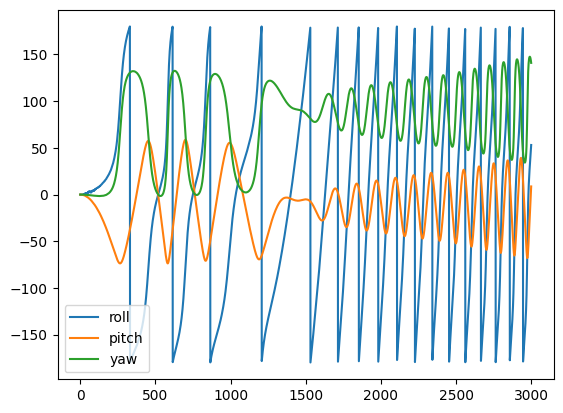

In [7]:
print(q.shape)
rotations = R.from_quat(q[:, :, 0])
plot_rpy(rotations.as_euler("zyx", degrees=True))

(3000, 4, 1)


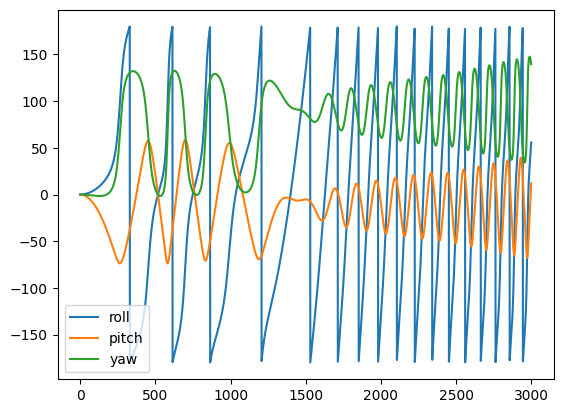

In [8]:
from quat import prop_matrix

naive_q = np.zeros((N, 4, 1))
naive_q[0, :, 0] = np.array([0, 0, 0, 1])
for i in range(1, N):
    naive_q[i] = prop_matrix(W[i]) @ naive_q[i - 1]
    # normalize
    naive_q[i] /= np.linalg.norm(naive_q[i])
    
rotations = R.from_quat(naive_q[:, :, 0])
plot_rpy(rotations.as_euler("zyx", degrees=True))

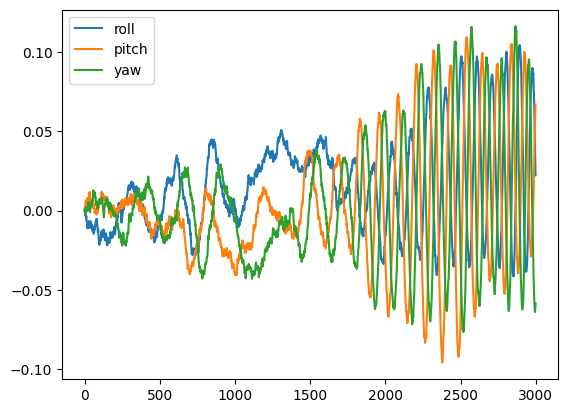

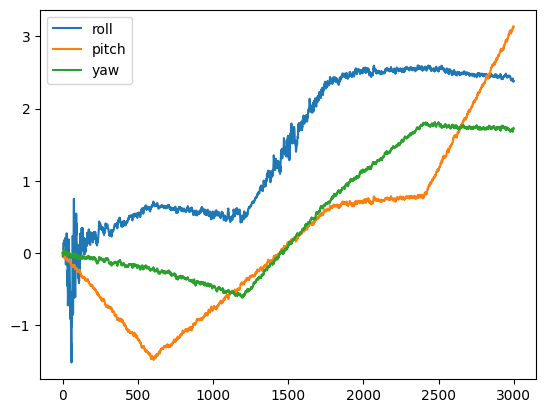

In [9]:
from quat import q_mul, q_inv

def get_err(q_est, q_gt):
    assert q_est.shape == q_gt.shape
    N, _, _ = q_est.shape
    q_err = np.zeros_like(q_est)
    for i in range(N):
        q_err[i] = q_mul(q_inv(q_est[i]), q_gt[i])
    
    rot_errs = R.from_quat(q_err[:, :, 0])
    plot_rpy(rot_errs.as_euler("zyx", degrees=True))
    return rot_errs
    
errs = get_err(naive_q, data["gt_q"])
errs2 = get_err(q, data["gt_q"])